In [ ]:
# %pip install -q pyvcell

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 821.6/821.6 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 65.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.3/211.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━

In [1]:
import pyvcell.vcml as vc

Matplotlib is building the font cache; this may take a moment.


# Model imported from VCell

In [ ]:
biomodel = vc.load_vcml_url("https://raw.githubusercontent.com/virtualcell/pyvcell/refs/heads/main/examples/models/Tutorial_MultiApp_PDE.vcml")
model = biomodel.model
display(biomodel)
display(model.parameter_values)

Biomodel(model=Model(compartments=['cyt', 'nuc', 'EC', 'pm', 'nm'], species=['Ran_cyt', 'C_cyt', 'RanC_nuc', 'RanC_cyt'], reactions=['r0', 'flux0'], parameters=[]), applications=['3D pde'], simulations=['Simulation4'])

{'r0.J': '((Kf * RanC_cyt) - ((Kr * Ran_cyt) * C_cyt))',
 'r0.Kf': 1.0,
 'r0.Kr': 1000.0,
 'flux0.J': '(kfl * (RanC_cyt - RanC_nuc))',
 'flux0.I': 0.0,
 'flux0.netValence': 1.0,
 'flux0.kfl': 2.0}

# change one parameter value and review changes

In [ ]:
model.set_parameter_value(name="r0.Kf", value=20.0)
display(model.parameter_values)

{'r0.J': '((Kf * RanC_cyt) - ((Kr * Ran_cyt) * C_cyt))',
 'r0.Kf': 20.0,
 'r0.Kr': 1000.0,
 'flux0.J': '(kfl * (RanC_cyt - RanC_nuc))',
 'flux0.I': 0.0,
 'flux0.netValence': 1.0,
 'flux0.kfl': 2.0}

# run N simulations with randomly sampled parameter values

In [ ]:
import numpy as np

# make mesh smaller to make it run faster - was (100, 100, 36)
sim = biomodel.applications[0].simulations[0]
sim.mesh_size = (50, 50, 18)

# take N samples from log-normal distibution for r0.Kf
N=5
r0_Kf_values = np.random.lognormal(mean=0, sigma=1.0, size=N)

# run N simulations and store results
all_results = []
for val in r0_Kf_values:
    model.set_parameter_value("r0.Kf", val)
    print(f"running sim with r0.Kf={val}")
    all_results.append(vc.simulate(biomodel, sim.name))

running sim with r0.Kf=2.123998768714199
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
running sim with r0.Kf=0.6356388870832252
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
running sim with r0.Kf=0.29791754613315957
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
running sim with r0.Kf=0.40682135840430395
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
running sim with r0.Kf=2.2251192480604987
Found shared library: /usr/local/lib/python3.11/dist-packages/libvcell/lib/libvcell.so
Found 

# plot nonspatial summaries of all trials

r0.Kf=2.123998768714199


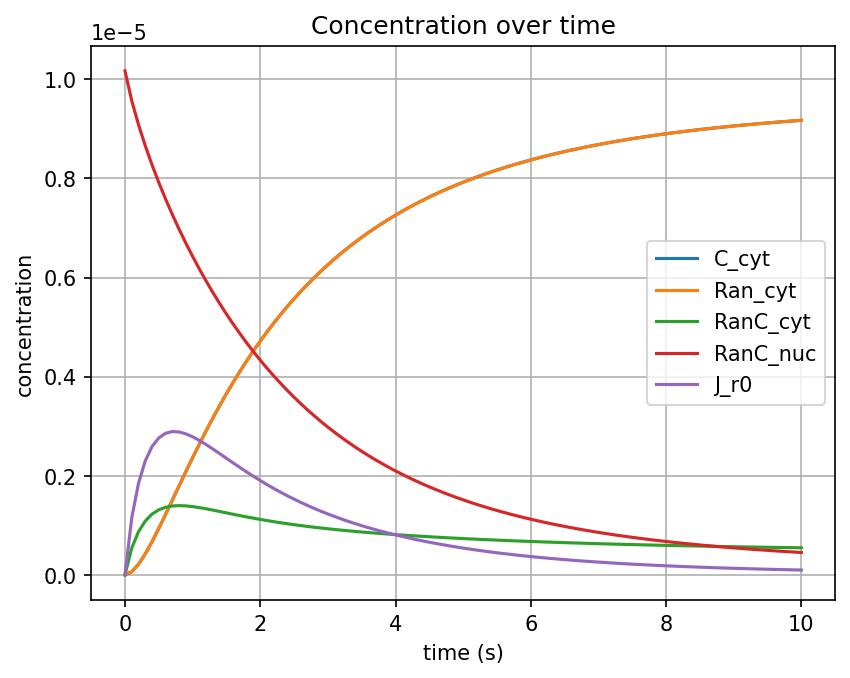

r0.Kf=0.6356388870832252


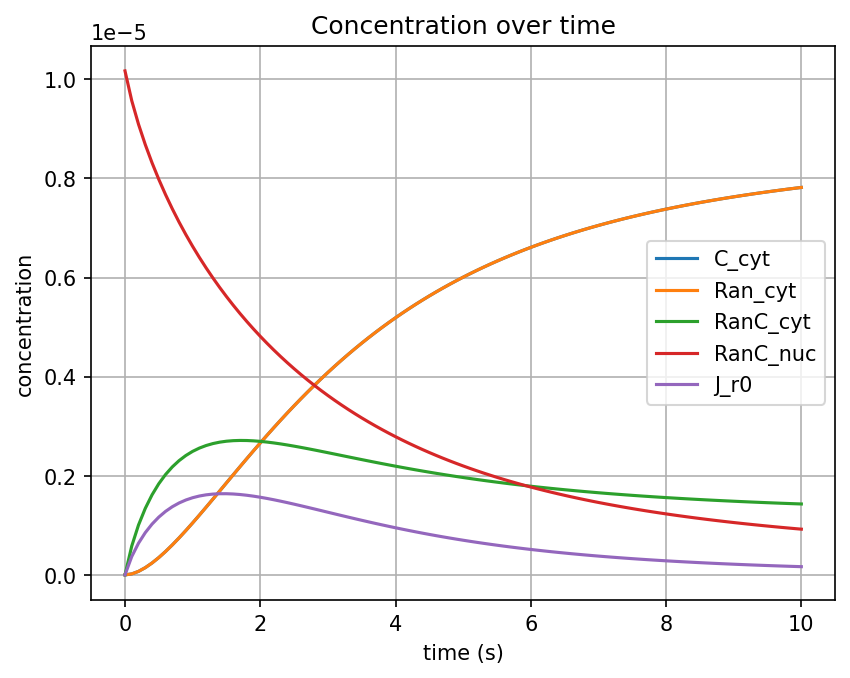

r0.Kf=0.29791754613315957


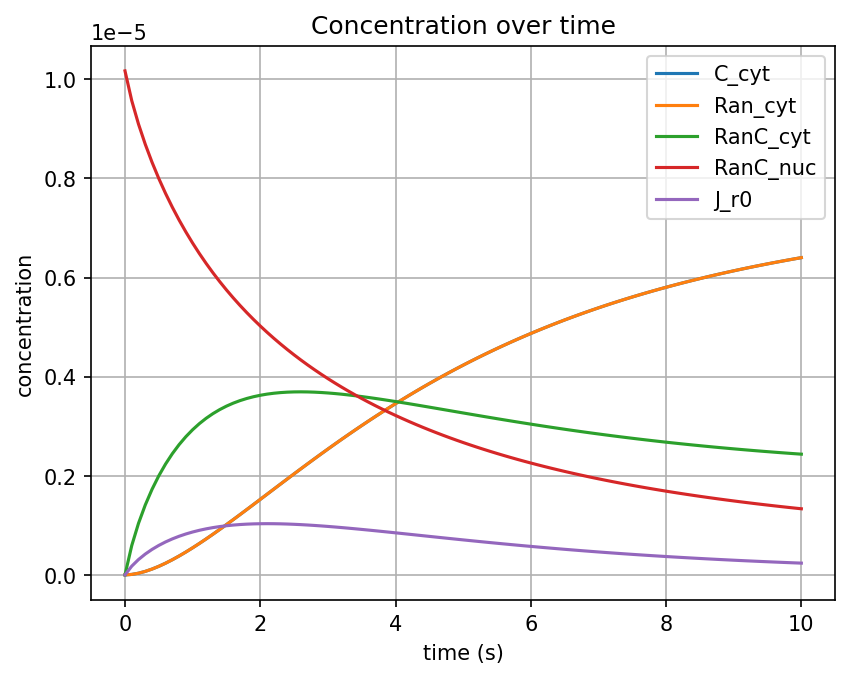

r0.Kf=0.40682135840430395


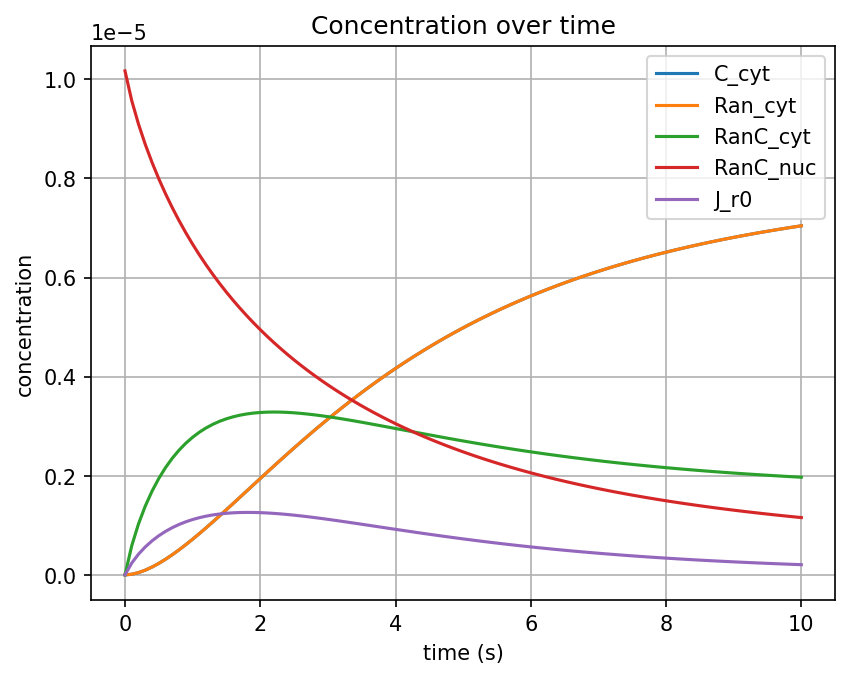

r0.Kf=2.2251192480604987


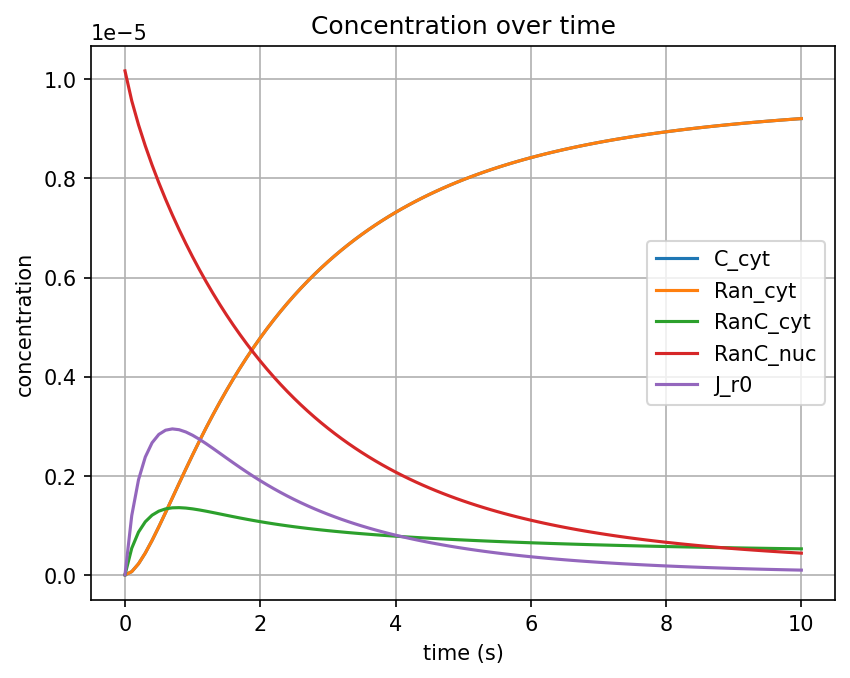

In [ ]:
for i in range(N):
    val = r0_Kf_values[i]
    result = all_results[i]
    print(f"r0.Kf={val}")
    result.plotter.plot_concentrations()